### Source

https://www.kaggle.com/c/tmdb-box-office-prediction/data

In [1]:
# Necessary imports
import os
import time
import timeit
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

# Modelling packages
from sklearn import ensemble, linear_model
from sklearn.feature_selection import chi2, f_classif, SelectKBest 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_rand_score, classification_report, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize

# Natural Language processing
import nltk
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_rcv1
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Clustering packages
import sklearn.cluster as cluster
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from scipy.spatial.distance import cdist

# Plotly packages
import cufflinks as cf
import ipywidgets as widgets
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from scipy import special
py.offline.init_notebook_mode(connected=True)

C:\Users\mhuh22\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Import the data
movies_train = pd.read_csv("train.csv")
movies_test = pd.read_csv("test.csv")

# Preview the dataset
movies_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
movies_train['release_date'] = movies_train['release_date'].astype('datetime64[ns]')

movies_train['year'] = movies_train['release_date'].dt.year
movies_train['month'] = movies_train['release_date'].dt.month

In [4]:
# Clean up the data for the current dataset
# def cleanDataset

# Remove variables with no predictive power from the dataset
movies_train.drop(['id', 'homepage', 'imdb_id'], axis=1, inplace=True)

In [5]:
# View datatypes in the dataset
movies_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null datetime64[ns]
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                     2987 non-null object
crew                     2984 non-null object
revenue    

In [6]:
# View number of movies in dataset
movies_train.shape

(3000, 22)

In [7]:
# Ciew number of null columns in the dataset
movies_train.isnull().sum().sort_values(ascending=False)

belongs_to_collection    2396
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
budget                      0
original_language           0
original_title              0
month                       0
popularity                  0
year                        0
status                      0
title                       0
revenue                     0
release_date                0
dtype: int64

In [8]:
# Print out column names and # of unique values in each categorical variable
movies_train.select_dtypes(include=['object']).nunique()

belongs_to_collection     422
genres                    872
original_language          36
original_title           2975
overview                 2992
poster_path              2999
production_companies     2383
production_countries      321
spoken_languages          401
status                      2
tagline                  2400
title                    2969
Keywords                 2648
cast                     2975
crew                     2984
dtype: int64

In [9]:
# View statistics on numeric columns for the dataset
movies_train.describe()

,budget,popularity,runtime,revenue,year,month
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000
mean,2.253133e+07,8.463274,107.856571,6.672585e+07,2004.579667,6.775333
std,3.702609e+07,12.104000,22.086434,1.375323e+08,15.480790,3.409115
min,0.000000e+00,0.000001,0.000000,1.000000e+00,1969.000000,1.000000
25%,0.000000e+00,4.018053,94.000000,2.379808e+06,1995.000000,4.000000
50%,8.000000e+06,7.374861,104.000000,1.680707e+07,2006.000000,7.000000
75%,2.900000e+07,10.890983,118.000000,6.891920e+07,2012.000000,10.000000
max,3.800000e+08,294.337037,338.000000,1.519558e+09,2068.000000,12.000000


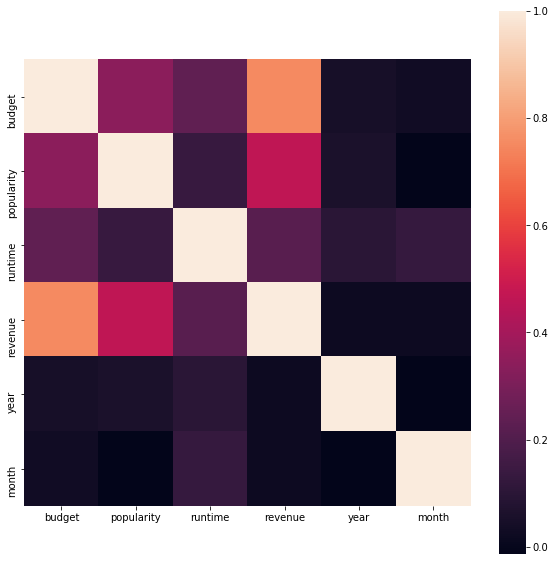

In [10]:
# Creates a correlation matrix among the predictor variables
plt.rcParams['figure.figsize'] = [10, 10]

correlation_martix = movies_train.corr()
sns.heatmap(correlation_martix, vmax = 1, square = True)
plt.show()

C:\Users\mhuh22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



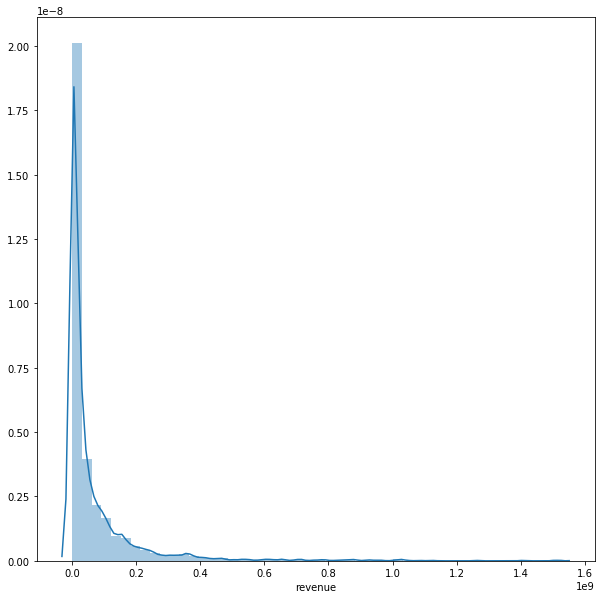

In [11]:
sns.distplot(movies_train.revenue)

In [12]:
movies_train['log_revenue'] = np.log(movies_train['revenue'])

C:\Users\mhuh22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



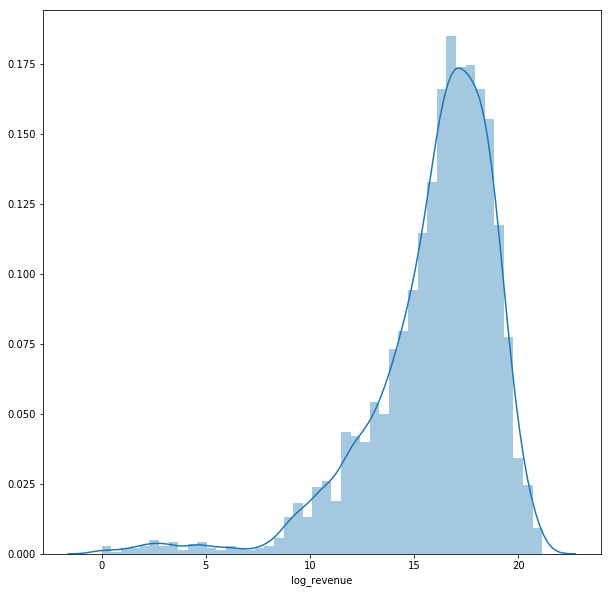

In [13]:
sns.distplot(movies_train.log_revenue)

In [14]:
# data = [go.Bar(
#     y = (movies_train.groupby('year')[['revenue']].sum()).revenue/ (movies_train['year']).value_counts().sort_index(),
#     opacity = 0.5,
#     text = (movies_train['year']).value_counts().sort_index(),
#     textposition = 'top',
#     marker=dict(
#         color='rgb(0,255,0)')
# )]

# layout = go.Layout(
#     title='Revenue per year',
# )

# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig, filename='cufflinks/simple')

In [15]:
# Impute all remaining missing values with 0s
movies_train.fillna(0, inplace=True)
movies_train.head()

,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,log_revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,16.326300
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,18.370959
2,0,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,16.387512
3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,Released,0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,16.588099
4,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,Released,0,Marine Boy,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,15.182614


In [16]:
# Temporarily ignore non-numeric values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_movies_train = movies_train.select_dtypes(include=numerics)

In [17]:
# Identify the input and output variables
X = numeric_movies_train.drop('revenue', axis=1)
y = movies_train['revenue']

In [18]:
# Divide the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Create dataframe to track runtime and scores
models = ['Logistic regression' , 'Random forest']
runtime = []
train_score = []
test_score = []

In [20]:
# Create a linear regression model
lr = linear_model.LinearRegression()

# Fit the model to the data, and predict values
lr.fit(X, y)
y_pred = lr.predict(X)

# Print the overall accuracy of the model
print('Score:', lr.score(X_test, y_test))

Score: 0.6539840237799238


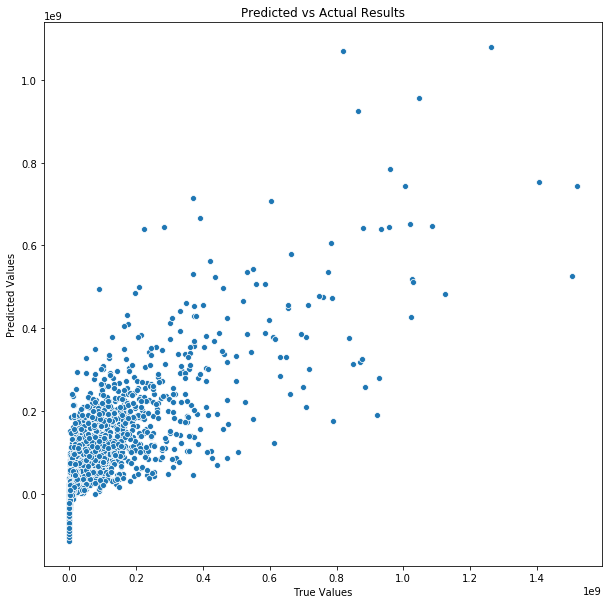

In [21]:
# Comparing predicted results to actual results
plt.title
ax = sns.scatterplot(x = 'True Values', 
                     y = 'Predicted Values', 
                     data = pd.DataFrame({'True Values': y, 'Predicted Values': y_pred}))\
                    .set_title('Predicted vs Actual Results')